# Assignment 3

## Imports
It is important for all (or most) imports to go on the top of a notebook so that other users know which packages need to be installed. In projects that use Anaconda, it is also common to see a file named requirements.txt listing all the packages that one has to install.

First, let's import all the necessary modules using the import function. For this exercise, we will continue to use pandas, numpy, and matplotlib. We will also be uisng statsmodels to conduct statistical analysis. 

To learn more about these packages, you can read through the documentation:  
https://pandas.pydata.org/  
https://numpy.org/  
https://matplotlib.org/  
https://www.statsmodels.org/stable/index.html  

In [1]:
# Let's import the relevant Python packages here
# Feel free to import any other packages for this project

# Data Wrangling
import pandas as pd
import numpy as np

# Statistics
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Plotting
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from sklearn.preprocessing import LabelEncoder

import seaborn as sns

## Data
This dataset contains 1,089 weekly stock market percentage returns for 21 years, from the beginning of 1990 to the end of 2010.

| Column | Description |
|:-|:-|
|Year | The year that the observation was recorded|
|Lag1 | Percentage return for the previous week|
|Lag2 | Percentage return for the previous 2 weeks|
|Lag3 | Percentage return for the previous 3 weeks|
|Lag4 | Percentage return for the previous 4 weeks|
|Lag5 | Percentage return for the previous 5 weeks|
|Volume | Volume of shares traded (average number of daily shares traded in billions)|
|Today | Percentage return for this week|
|Direction | A factor with levels Down and Up indicating whether the market had a positive or negative return on a given week|

Once again, we will begin by loading the dataset using pandas

In [3]:
weekly = pd.read_csv("Weekly.csv")
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


1. First, transform our `Direction` variable into a numerical feature that is equal to 1 if `Direction = Up`.

In [4]:
# your code here

le = LabelEncoder()

weekly["Direction"] = le.fit_transform(weekly.Direction)

weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,1


In [5]:
#weekly.to_csv("Weekly2.csv", index=False)

You may now want to produce several numerical and graphical summaries of the `Weekly` data and check for patterns (Hint: see if you can find a correlation between `Year` and `Volume)`

In [6]:
# your code here
weekly.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460,-0.022200
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032,-0.050004
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167,0.072696
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244,-0.022913
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826,-0.020549
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013,-0.018168
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078,-0.017995
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000,0.720025
Direction,-0.022200,-0.050004,0.072696,-0.022913,-0.020549,-0.018168,-0.017995,0.720025,1.000000


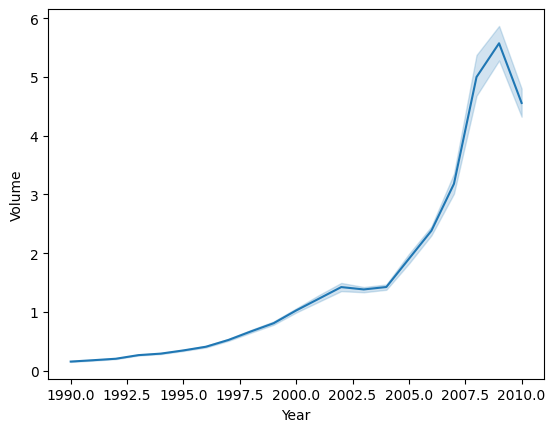

In [7]:
sns.lineplot(data=weekly, x="Year", y="Volume")
plt.show()

2. Use the full dataset to perform logistic regression with `Direction` as the response and the 5 `Lag` variables as predictors.

In [8]:
# your code here
formula = 'Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5'

In [9]:
model = smf.logit(formula, data=weekly).fit()

Optimization terminated successfully.
         Current function value: 0.682615
         Iterations 4


In [10]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1083
Method:                           MLE   Df Model:                            5
Date:                Thu, 30 May 2024   Pseudo R-squ.:                0.006327
Time:                        07:45:50   Log-Likelihood:                -743.37
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                   0.09186
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2303      0.062      3.712      0.000       0.109       0.352
Lag1          -0.0401      0.026     -1.522      0.128      -0.092       0.012
Lag2           0.0602      0.027      2.249      0.025       0.008       0.113
Lag3          -0.0151      0.027     -0.566      0.571      -0.067       0.037
Lag4          -0.0268      0.026     -1.013      0.311      -0.079       0.025
Lag5          -0.0135      0.026     -0.512      0.609      -0.065       0.038
==============================================================================
"""

How many variables are statistically significant? Store your result in a variable named `num_significant`. (Hint: use the summary() function)

In [11]:
num_significant = 1 # Save your solution in this variable
# your code here


In [12]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert num_significant == 1, "Wrong value for num_significant, try again.."

Save any variables that are statistically significant in a list named `var_significant`.

In [13]:
var_significant = ['Lag2'] # Save your solution in this variable
# your code here


In [14]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert len(var_significant) == 1, "There should be num_significant entries in the list"
assert var_significant[0] == 'Lag2', "That is not the correct variable, try again.."

3. Compute the overall fraction of correct predictions. Store your result in a variable named `fraction_correct`.

In [15]:
# Predict the probabilities of being 'Up'
weekly['pred_prob'] = model.predict(weekly)

In [16]:
# Predict the class labels
weekly['pred_label'] = (weekly['pred_prob'] > 0.5).astype(int)

In [17]:
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,pred_prob,pred_label
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,0,0.599794,1
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,0,0.592654,1
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,1,0.578358,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,1,0.473890,0
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,1,0.610207,1


In [18]:
# Compute the fraction of correct predictions
fraction_correct = (weekly['pred_label'] == weekly['Direction']).mean()

In [19]:
fraction_correct

0.5629017447199265

In [20]:
fraction_correct = 0.5629017447199265 # Save your solution in this variable
# your code here


In [21]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert np.allclose(fraction_correct, 0.5629017447199265, .001), "Incorrect result, try again.. (hint: use the predict() function)"

5. Now fit the logistic regression model using a training data period from 1990 to 2007, with `Lag2` as the only predictor.

Compute the overall fraction of correct predictions for the held out data (that is, the data from 2008, 2009 and 2010) and store it in a variable named `fraction_correct_test`. 

In [22]:
weekly = pd.read_csv("Weekly2.csv")

weekly

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,1
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,1
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,1
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,1
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,1


In [23]:
### We have split the data for you
train = weekly[weekly['Year'] <= 2007]
test = weekly[weekly['Year'] > 2007]

# Define the formula for the model
formula = 'Direction ~ Lag2'

model = smf.logit(formula, data=train).fit()

model.summary()

Optimization terminated successfully.
         Current function value: 0.685159
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                  933
Model:                          Logit   Df Residuals:                      931
Method:                           MLE   Df Model:                            1
Date:                Thu, 30 May 2024   Pseudo R-squ.:                0.001673
Time:                        07:45:51   Log-Likelihood:                -639.25
converged:                       True   LL-Null:                       -640.32
Covariance Type:            nonrobust   LLR p-value:                    0.1433
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2266      0.066      3.422      0.001       0.097       0.356
Lag2           0.0472      0.032      1.460      0.144      -0.016       0.110
==============================================================================
"""

In [24]:
test = test.copy()

In [25]:
# Predict the probabilities of being 'Up'
test['pred_prob'] = model.predict(test)

In [26]:
# Predict the class labels
test['pred_label'] = (test['pred_prob'] > 0.5).astype(int)

In [27]:
fraction_correct_test = (test['pred_label'] == test['Direction']).mean()

# your code here

fraction_correct_test

0.5512820512820513

In [28]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert np.allclose(fraction_correct_test, 0.5512820512820513, .001), "Incorrect result, try again.. (hint: use the predict() function)"

Now, we want to develop an investment strategy in which we buy if the returns are greater than
$0.5\%$ and sell otherwise.

6. Create a response variable named `Response` such that

$$
\text{Response}_i = \begin{cases}
1 \text{ if Today } > 0.5 &\\
0 \text{ otherwise }
\end{cases}
$$

In [29]:
weekly = pd.read_csv("Weekly2.csv")

weekly

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,1
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,1
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,1
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,1
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,1


In [30]:
# your code here
# Create the 'Response' variable
weekly['Response'] = (weekly['Today'] > 0.5).astype(int)


weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,Response
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,0,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,0,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,1,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,1,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,1,1


7.  Fit a logistic regression model to predict `Response` using a training data period from 1990 to 2008, with the five lag variables and volume as predictors.

In [31]:
### We have split the data for you
train = weekly[weekly['Year'] <= 2008]
test = weekly[weekly['Year'] > 2008]

# your code here
# Define the formula for the model
formula = 'Response ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume'

In [32]:
model = smf.logit(formula, data=train).fit()

model.summary()

Optimization terminated successfully.
         Current function value: 0.681276
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Response   No. Observations:                  985
Model:                          Logit   Df Residuals:                      978
Method:                           MLE   Df Model:                            6
Date:                Thu, 30 May 2024   Pseudo R-squ.:                0.008988
Time:                        07:45:51   Log-Likelihood:                -671.06
converged:                       True   LL-Null:                       -677.14
Covariance Type:            nonrobust   LLR p-value:                   0.05825
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0780      0.094     -0.831      0.406      -0.262       0.106
Lag1          -0.0737      0.029     -2.500      0.012      -0.132      -0.016
Lag2           0.0293      0.030      0.985      0.325      -0.029       0.088
Lag3          -0.0147      0.029     -0.503      0.615      -0.072       0.043
Lag4          -0.0246      0.029     -0.840      0.401      -0.082       0.033
Lag5          -0.0314      0.029     -1.072      0.284      -0.089       0.026
Volume        -0.1039      0.055     -1.886      0.059      -0.212       0.004
==============================================================================
"""

How many variables are statistically significant? Store your result in a variable named `num_significant_B`. (Hint: use the summary() function)

In [33]:
num_significant_B = 1 # Save your solution in this variable
# your code here


In [34]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert num_significant_B == 1, "Wrong value for num_significant_B, try again.."

Save any variables that are statistically significant in a list named `var_significant_B`.

In [35]:
var_significant_B = ['Lag1'] # Save your solution in this variable
# your code here


In [36]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert len(var_significant_B) == 1, "There should be num_significant entries in the list"
assert var_significant_B[0] == 'Lag1', "That is not the correct variable, try again.."

Compute the overall fraction of correct predictions for the held out data (that is, the data
from 2009 and 2010). Store this value in a variable named `fraction_correct_B`.

In [37]:
test = test.copy()

In [38]:
# Predict the probabilities of being 'Up'
test['pred_prob'] = model.predict(test)

In [39]:
# Predict the class labels
test['pred_label'] = (test['pred_prob'] > 0.5).astype(int)

In [40]:
fraction_correct_B = (test['pred_label'] == test['Response']).mean()
fraction_correct_B

0.5

In [41]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert np.allclose(fraction_correct_B, 0.5, .001), "Incorrect result, try again.. (hint: use the predict() function)"